Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


loading dataset

In [2]:
data=pd.read_csv(r"diabetes.csv")

Checking first few rows of data

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Checking summary of data

In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Checking number of zeros in each column

In [5]:
(data==0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

Zero values in the "Glucose","BloodPressure","SkinThickness","Insulin","BMI" do not make sense and are therefore replaced by NaN

In [6]:
data[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]]=data[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]].replace(0,np.NaN)
print(data.isnull().sum())
data.head()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


Filling missing values (NaN values) with mean column values

In [7]:
data.fillna(data.mean(),inplace=True)
print(data.isnull().sum())
data.head()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


Visualizing data

C:\Users\tba5d\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\tba5d\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\tba5d\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\tba5d\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in r

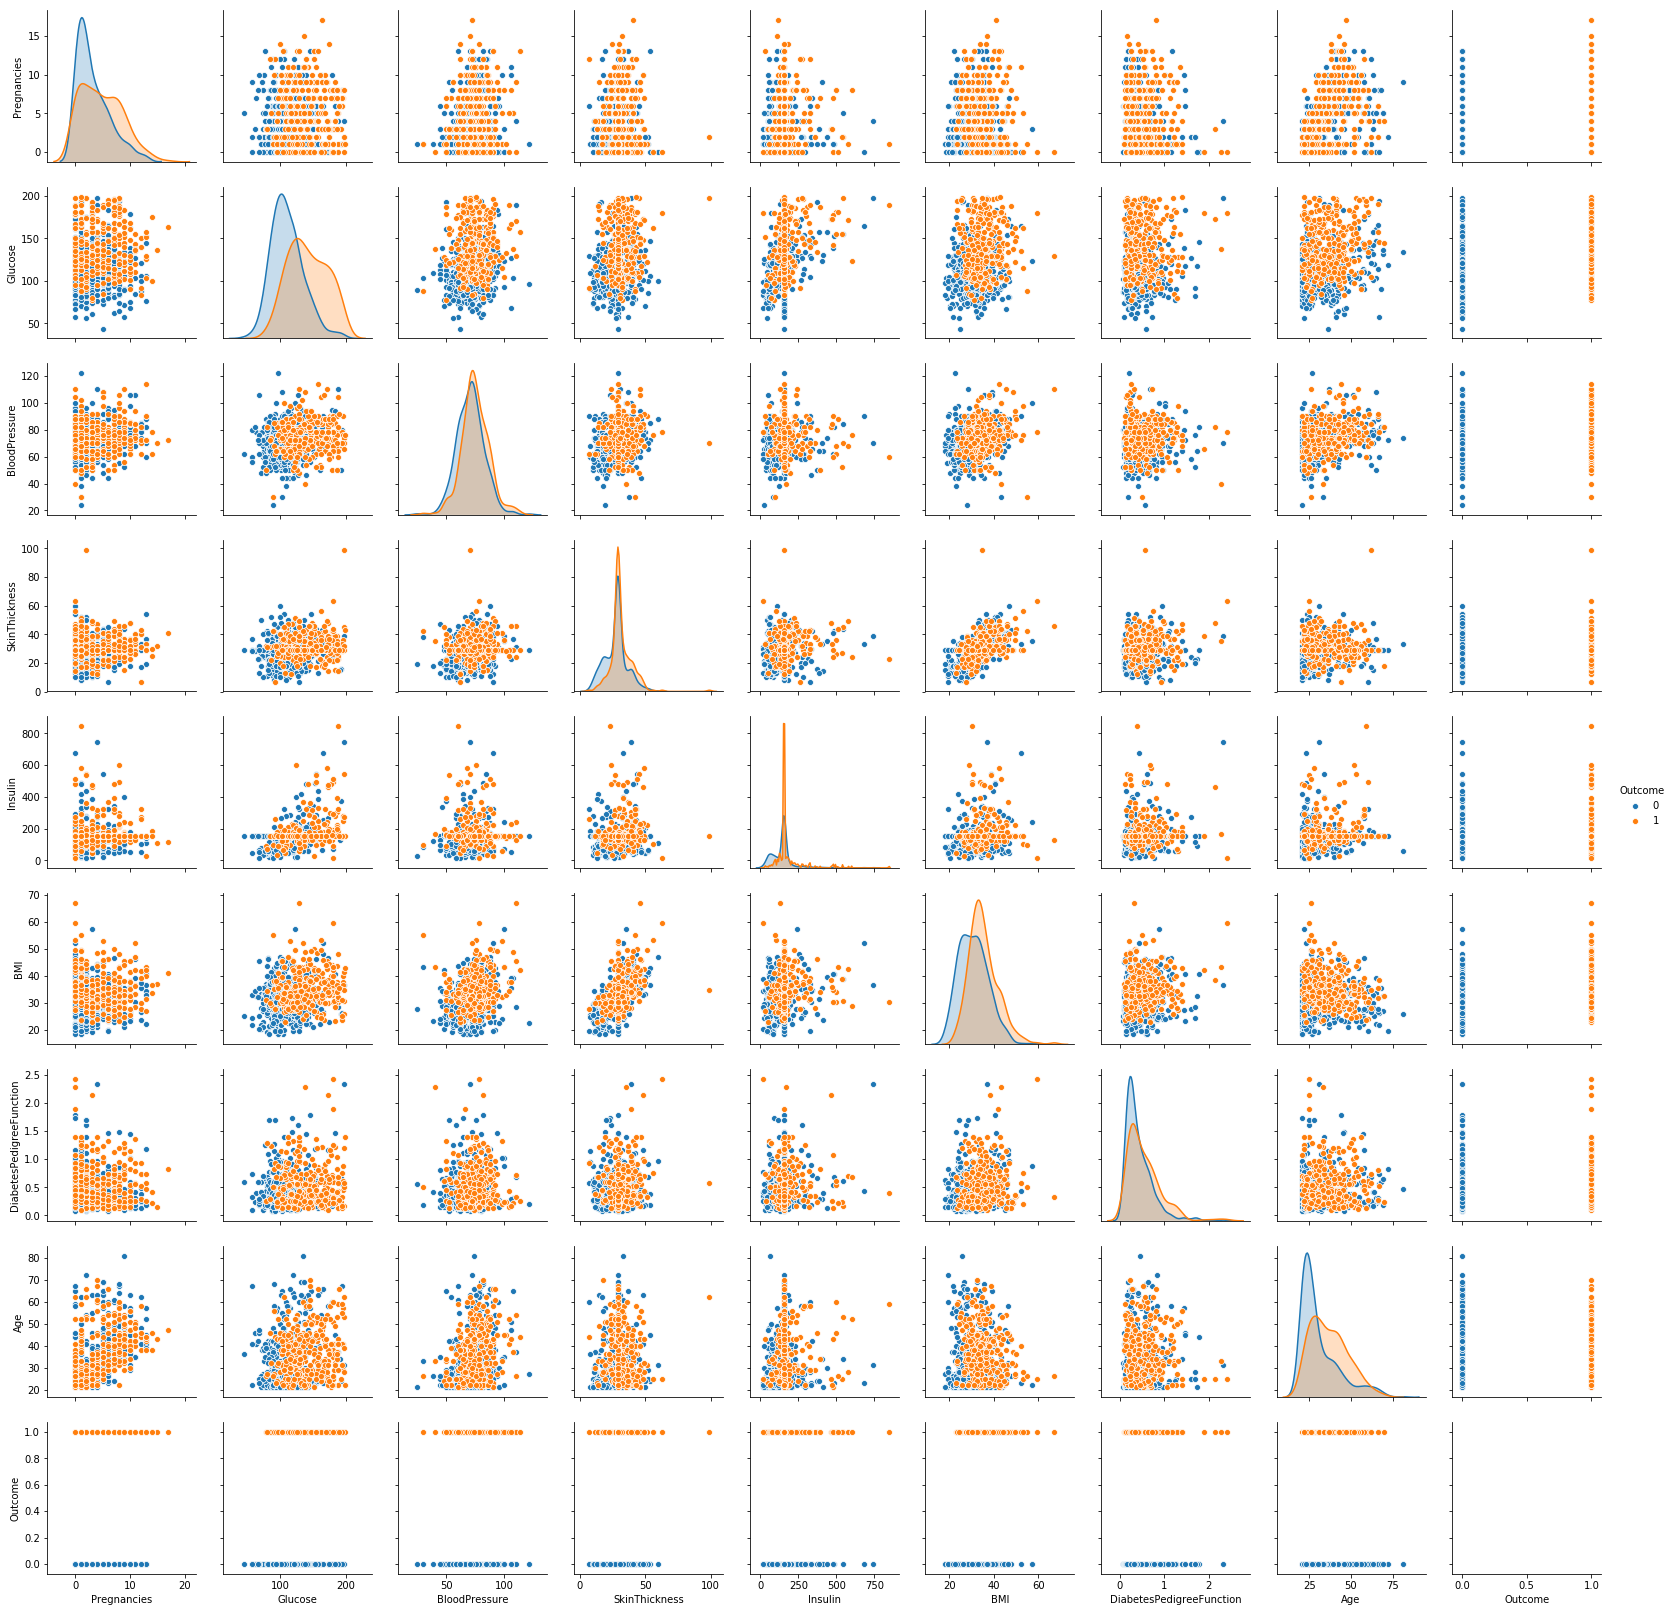

In [8]:
sns.pairplot(data,hue="Outcome")

Skin thickness of 99mm appears to be an outlier and is removed from the data.

In [9]:
data=data[data["SkinThickness"]!=99]

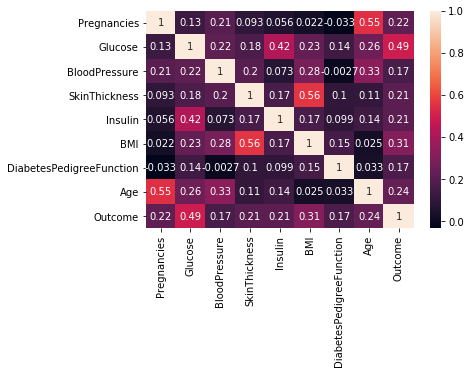

In [10]:
sns.heatmap(data.corr(),annot=True)

C:\Users\tba5d\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


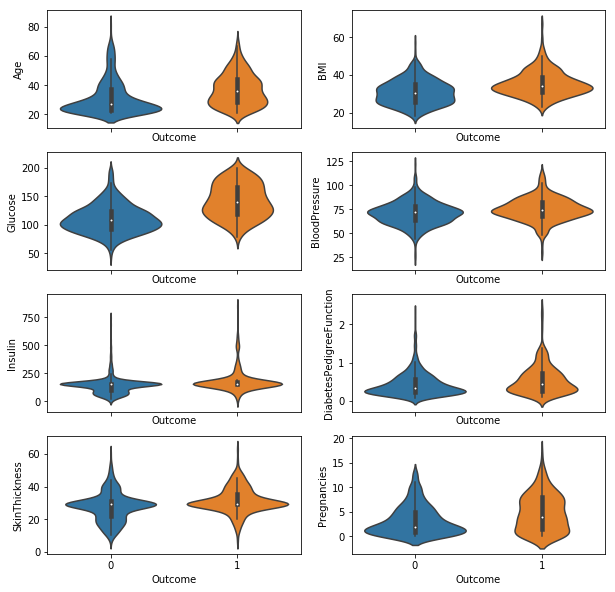

In [11]:
fig,ax=plt.subplots(nrows=4,ncols=2,figsize=(10,10),sharex=True,sharey=False)
sns.violinplot(x="Outcome",y="Age",data=data,ax=ax[0,0])
sns.violinplot(x="Outcome",y="BMI",data=data,ax=ax[0,1])
sns.violinplot(x="Outcome",y="Glucose",data=data,ax=ax[1,0])
sns.violinplot(x="Outcome",y="BloodPressure",data=data,ax=ax[1,1])
sns.violinplot(x="Outcome",y="Insulin",data=data,ax=ax[2,0])
sns.violinplot(x="Outcome",y="DiabetesPedigreeFunction",data=data,ax=ax[2,1])
sns.violinplot(x="Outcome",y="SkinThickness",data=data,ax=ax[3,0])
sns.violinplot(x="Outcome",y="Pregnancies",data=data,ax=ax[3,1])


Splitting data into features and target

In [12]:
X=data.drop(["Outcome"],axis=1)
y=data.Outcome

X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33


normalizing skewed features "Age","DiabetestPedigreeFunction","Insulin", "BMI"

C:\Users\tba5d\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


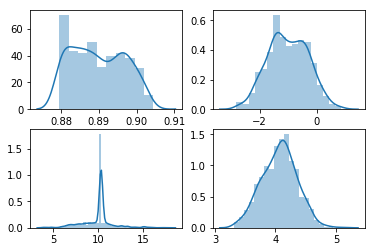

In [13]:
from scipy import stats

AgeN = stats.boxcox(X["Age"])[0]
DiabetesPedigreeFunctionN = stats.boxcox(X["DiabetesPedigreeFunction"])[0]
InsulinN = stats.boxcox(X["Insulin"])[0]
BMIN = stats.boxcox(X["BMI"])[0]

fig,ax=plt.subplots(nrows=2,ncols=2)
sns.distplot(AgeN,ax=ax[0,0])
sns.distplot(DiabetesPedigreeFunctionN,ax=ax[0,1])
sns.distplot(InsulinN,ax=ax[1,0])
sns.distplot(BMIN,ax=ax[1,1])


Replacing Age and DiabetesPedigreeFunction columns in X with the normalized versions

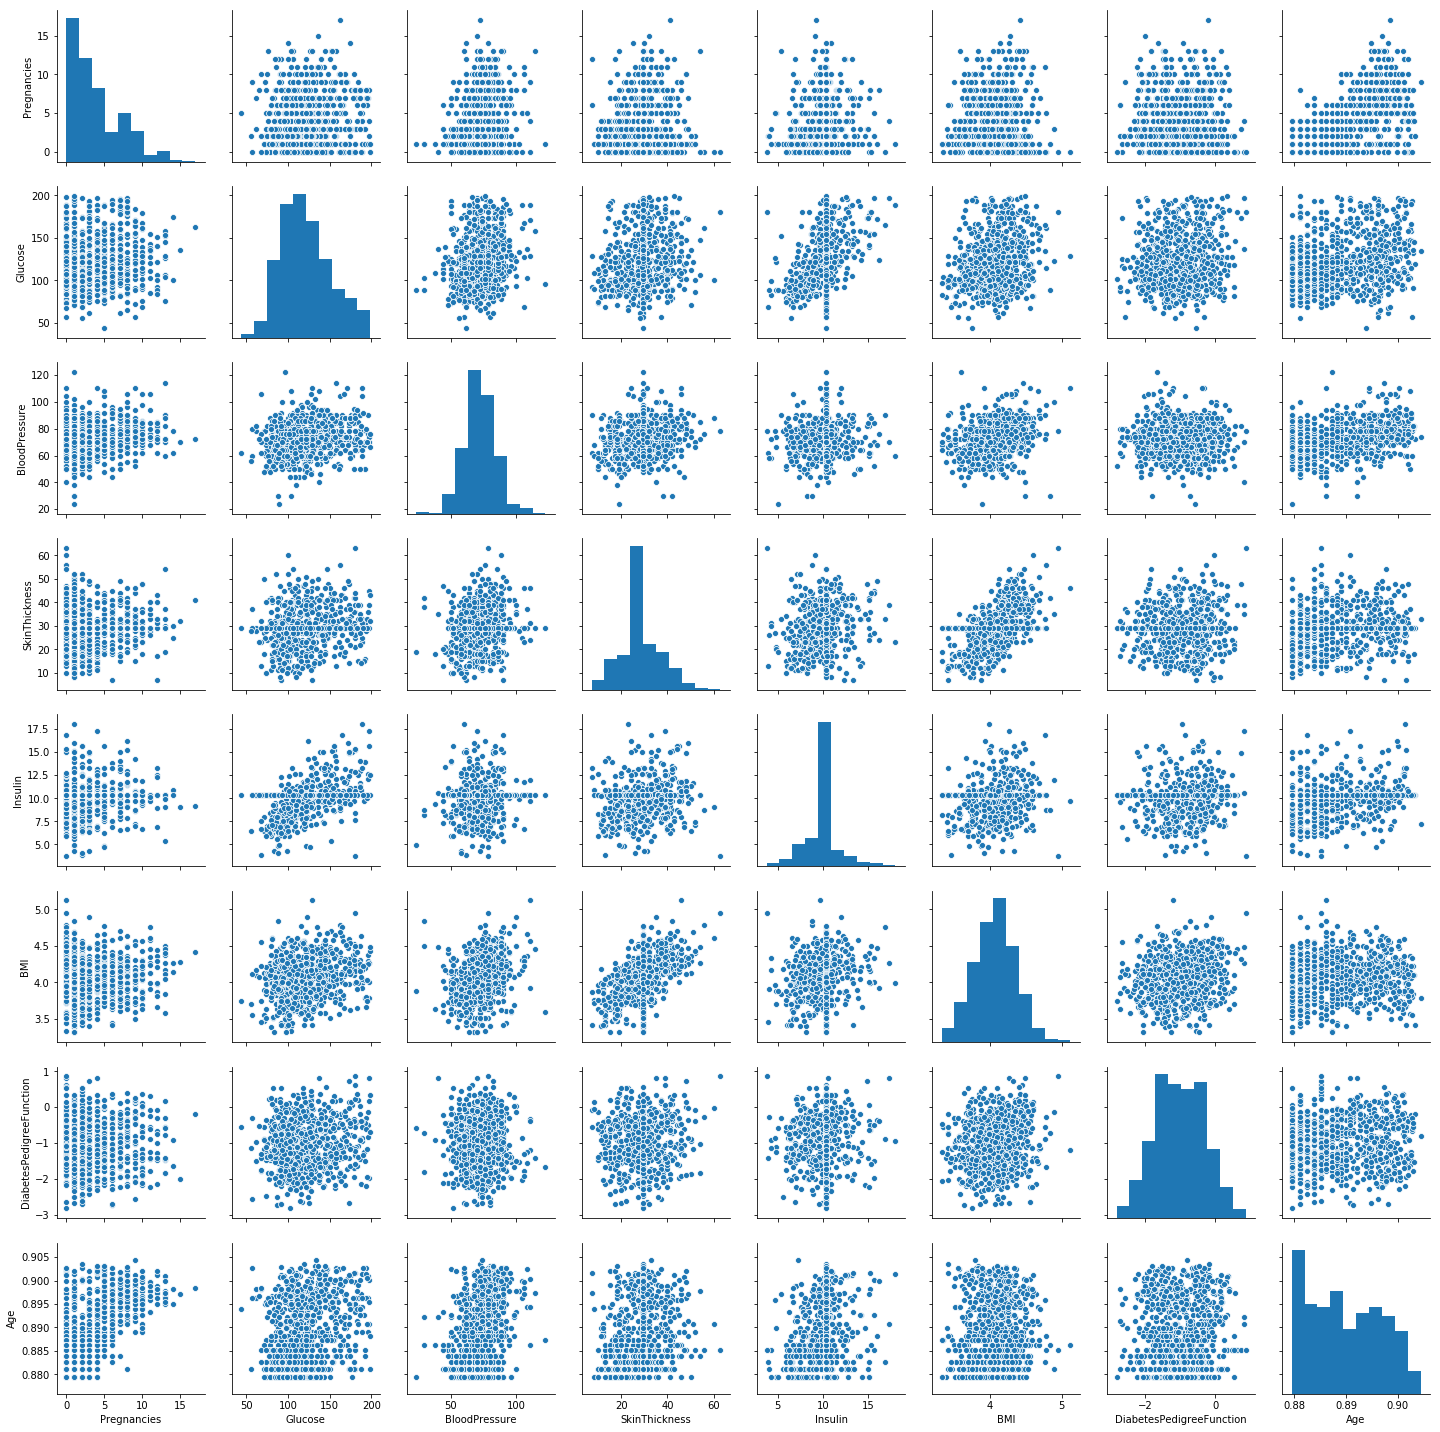

In [14]:
X["Age"] = AgeN
X["DiabetesPedigreeFunction"]=DiabetesPedigreeFunctionN
X["Insulin"]=InsulinN
X["BMI"]=BMIN

sns.pairplot(X)

Splitting data into train and test sets, scaling features, importing LogisticRegressionCV from sklearn 

In [15]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

n_folds = 10
C_values = [0.001, 0.01, 0.05, 0.1, 1., 100.]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
sc=StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

lr_model = LogisticRegressionCV(Cs=C_values, cv=n_folds, penalty='l1',refit=True, scoring='roc_auc',solver='liblinear',random_state=0,fit_intercept=False)
lr_model.fit(X_train_scaled,y_train)
score = lr_model.score(X_test_scaled,y_test)
print("The score is: {}".format(score))

The score is: 0.8823291221250406


C:\Users\tba5d\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\tba5d\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\tba5d\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\tba5d\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1920: ChangedBehaviorWarning: The long-standing behavior to use the accuracy score has changed. The scoring parameter is now used. This warning will dis